# Assignment 1.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdataanalysis2016/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Sunday Februrary 28th, 2016 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 24 hours to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday February 29th, 2016 at 23:55.

## Assignment 1A: Anscombe's quartet


Start by downloading these four datasets: [Data 1](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data1.tsv), [Data 2](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data2.tsv), [Data 3](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data3.tsv), and [Data 4](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.

* Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
* Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
* Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
* Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
* The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
```
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
```
* Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/anscombe.png).)
* Explain - in your own words - what you think my point with this exercise is.

In [56]:
#Packages needed for assignments
import urllib
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import csv
from __future__ import division
import geoplotlib
from geoplotlib.utils import BoundingBox
from collections import Counter
#Makes it so pyplot is plotted inline
%matplotlib inline  

## Download data

In [57]:
#Downloading the files to disk using urllib
urllib.urlretrieve ("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data1.tsv", "data1.tsv");
urllib.urlretrieve ("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data2.tsv", "data2.tsv");
urllib.urlretrieve ("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data3.tsv", "data3.tsv");
urllib.urlretrieve ("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data4.tsv", "data4.tsv");

In [58]:
#Making empty lists in order to append data
x1, x2, x3, x4, y1, y2, y3, y4 = ([] for i in range(8))

#store data from the first dataset
with open("data1.tsv") as data_1_file:
    tsvreader = csv.reader(data_1_file, delimiter="\t")
    for line in tsvreader:
        #Using int for x because the first colunm only contains integers
        x1.append(int(line[0]))
        #Using float for y because the second colunm doesn't not contains integers 
        y1.append(float(line[1]))
        
#Using the same approced as above for the rest of the datasets
with open("data2.tsv") as data_1_file:
    tsvreader = csv.reader(data_1_file, delimiter="\t")
    for line in tsvreader:
        x2.append(int(line[0]))
        y2.append(float(line[1]))
        
with open("data3.tsv") as data_1_file:
    tsvreader = csv.reader(data_1_file, delimiter="\t")
    for line in tsvreader:
        x3.append(int(line[0]))
        y3.append(float(line[1]))
        
with open("data4.tsv") as data_1_file:
    tsvreader = csv.reader(data_1_file, delimiter="\t")
    for line in tsvreader:
        x4.append(int(line[0]))
        y4.append(float(line[1]))

## Numpy functions

* Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 

In [59]:
x1_mean, x2_mean, x3_mean, x4_mean = np.mean(x1),np.mean(x2),np.mean(x3),np.mean(x4)
y1_mean, y2_mean, y3_mean, y4_mean = np.mean(y1),np.mean(y2),np.mean(y3),np.mean(y4)

* Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 

In [60]:
#making a list for the mean values for better readability 
list_x_mean = [x1_mean, x2_mean, x3_mean, x4_mean]
list_y_mean = [y1_mean, y2_mean, y3_mean, y4_mean]

#Using loop to print the string formatted mean
for xmean,ymean in zip(list_x_mean, list_y_mean):
    #Print the xmean on the left side and ymean on the rigth side
    print "{:4.2f}".format(xmean), "{:4.2f}".format(ymean)

9.00 7.50
9.00 7.50
9.00 7.50
9.00 7.50


* Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).

In [61]:
#Making list of x and y values
list_x = [x1, x2, x3, x4]
list_y = [y1, y2, y3, y4]

#Making use of loop to print every variance
for x,y in zip(list_x,list_y):
    print "{:5.3f}".format(np.var(x)), "{:5.3f}".format(np.var(y))

10.000 3.752
10.000 3.752
10.000 3.748
10.000 3.748


* Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).

In [62]:
#Using loop to print every Pearson correlation
for x,y in zip(list_x,list_y):
    print "{:5.3f}".format(np.corrcoef(x,y)[0][1])

0.816
0.816
0.816
0.817


* The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
```
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
```

In [63]:
#Fitting the data to the model
np_x1, np_x2, np_x3, np_x4 = np.array(x1), np.array(x2), np.array(x3), np.array(x4)
np_y1, np_y2, np_y3, np_y4 = np.array(y1), np.array(y2), np.array(y3), np.array(y4)


#Using scipy to calculate various values concering line regression for the firs data set
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(np_x1, np_y1)

#Calculate the y value for the straight line f(x) = ax + b
predict_y_1 = intercept + slope * np_x1

#repeating the two previous step for rest of the datasets
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(np_x2, np_y2)
predict_y_2 = intercept + slope * np_x2

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(np_x3, np_y3)
predict_y_3 = intercept + slope * np_x3

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(np_x4, np_y4)
predict_y_4 = intercept + slope * np_x4

* Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/anscombe.png).)

## Plotting the data

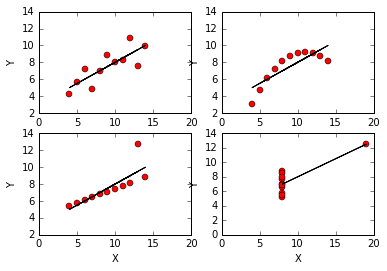

In [64]:
#plotting for data1.tsv
#place the plot on a subplot
plt.subplot(221)
#Define the axis
plt.axis([0, 20, 2, 14])
#Naming the x & y axis
plt.xlabel('X')
plt.ylabel('Y')
#plotting the dataset
plt.plot(np_x1,np_y1, 'o', color='r')
#plotting the line regression
plt.plot(np_x1,predict_y_1, 'k')

#plotting for data2.tsv
plt.subplot(222)
plt.axis([0, 20, 2, 14])
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(np_x2,np_y2, 'o', color = 'r')
plt.plot(np_x2,predict_y_2, 'k')

#Plotting for data3.tsv
plt.subplot(223)
plt.axis([0, 20, 2, 14])
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(np_x3,np_y3, 'o', color = 'r')
plt.plot(np_x3,predict_y_3, 'k')

#Plotting for data4.tsv
plt.subplot(224)
plt.axis([0, 20, 0, 14])
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(np_x4,np_y4, 'o', color = 'r')
plt.plot(np_x4,predict_y_4, 'k')
plt.show()

* Explain - in your own words - what you think my point with this exercise is.

The point of this exercise is to examine the dataset, to be more precise, visualize the data. By visualize the data is it possible to get an idea about what we are working with. Because based on our calculations (mean, variance, pearsson correlation etc.) for each dataset result in the same values when compared.[[1]](http://data.heapanalytics.com/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story "Anscombe's quartet")

## Assignment 1B: Slicing data

We investigate the types of crime and how they take place across San Francisco's police districts.

In [65]:
#Loading the SFPD file
data = pd.read_csv('SFPD_Incidents_-_from_1_January_2003.csv', sep=',')

* We'll be combining information about _PdDistrict_ and _Category_ to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.

In [66]:
#Get the 10 police districts and remove the first element since it's nan.
list(set(data['PdDistrict']))[1:]

['CENTRAL',
 'NORTHERN',
 'INGLESIDE',
 'SOUTHERN',
 'MISSION',
 'TENDERLOIN',
 'RICHMOND',
 'TARAVAL',
 'BAYVIEW',
 'PARK']

* Which has the most crimes? Which has the most focus crimes?

In [67]:
#Count every crime for each district
data['PdDistrict'].value_counts()

SOUTHERN      335978
MISSION       253378
NORTHERN      226600
BAYVIEW       189359
CENTRAL       184686
TENDERLOIN    170891
INGLESIDE     168097
TARAVAL       140757
PARK          106392
RICHMOND       96512
Name: PdDistrict, dtype: int64

It can be seen that SOUTHERN district has most crimes with the count of 335978.

In [68]:
#Taking the focus crimes that was stated in week 3
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

#For readability a list is made to hold all the cases related to focuscrime
#This is done using loc and isin
temp_data = data.loc[(data.Category.isin(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']))]
#Count every focuscrime done in each district
temp_data['PdDistrict'].value_counts()

SOUTHERN      191521
NORTHERN      144233
MISSION       140687
CENTRAL       114576
BAYVIEW        99701
TENDERLOIN     96678
INGLESIDE      93557
TARAVAL        78400
PARK           59022
RICHMOND       56280
Name: PdDistrict, dtype: int64

When only looking list then it can be seen that SOUTHERN has the most focus crimes witht he count of 191521.

* Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going
  - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/categoryhist.png). Let's call it `P(crime)`.

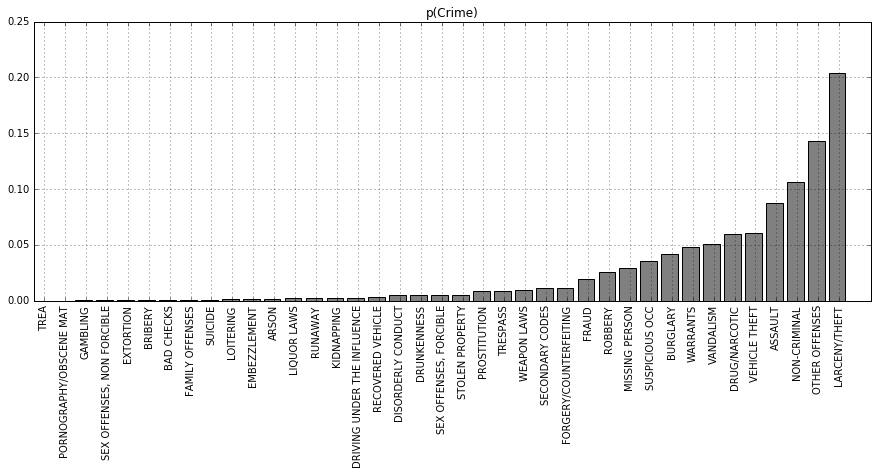

In [69]:
#Make a list of all categories that is counted and sorted
categories = Counter(data['Category']).most_common()

#Make use of zip and sum to get the relative probabilities of seeing each type of crime
crimes = sum([c[1] for c in categories])
pCrime = zip([c[0] for c in categories], [c[1] / float(crimes) for c in categories]) 

#Set the x-axis
x_axis = np.arange(len(categories))
#plotting P(crime)
plt.figure(figsize=(15,5))
plt.grid(True)
plt.bar(x_axis, [cat[1] for cat in reversed(pCrime)], color='gray');
plt.xticks(x_axis+0.5, [cat[0] for cat in reversed(pCrime)],rotation=90);
plt.title('p(Crime)');

  - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
  - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
  - For each district plot these ratios for the 14 focus crimes. My plot looks like this

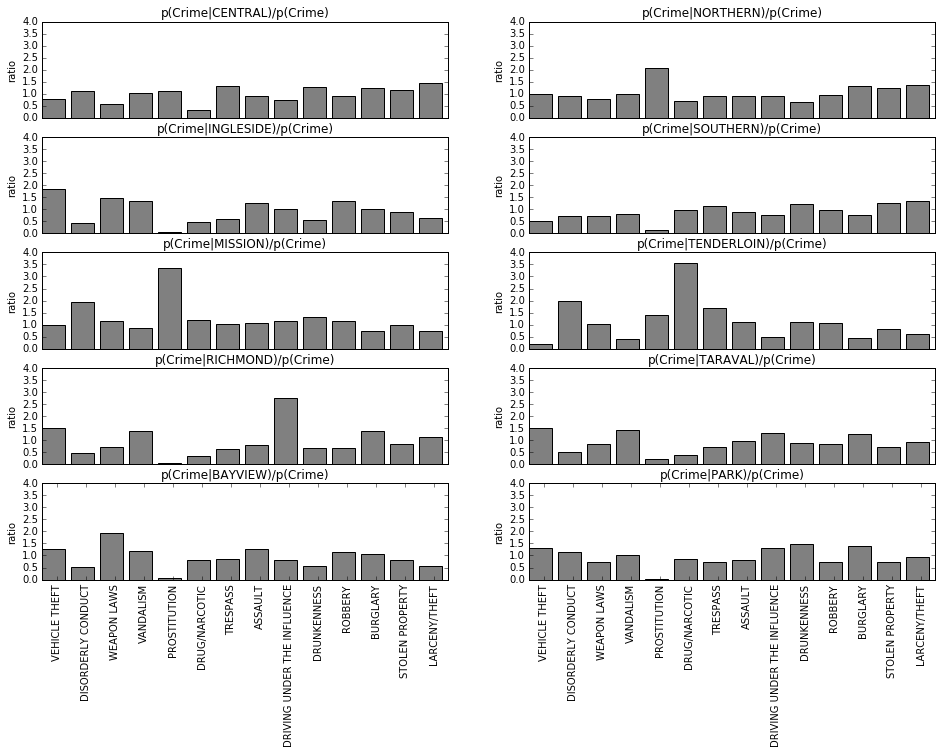

In [70]:
# Calculate crime rates for all districts
d = Counter(data.Category)
crimes = float(sum(d.values()))
#normalize by crimes
pCrime = {key:d[key]/crimes for key in d.keys()}

#list districts
districts = list(set(data['PdDistrict']))[1:]

#Set figure size
plt.figure(figsize=(16,10))

# Calculate crime rates for single districts
for i in range(len(districts)):
    # extract data
    d = Counter(data.loc[data.PdDistrict.isin({districts[i]})].Category)
    
    # total incidents
    crimes = float(sum(d.values()))
    
    # p(Crime|District) 
    pCrimeDistrict = {key:d[key]/crimes for key in d.keys()}

    # Normalize by the total rates
    normCrimeDistrict = {key:pCrimeDistrict[key]/pCrime[key] for key in pCrimeDistrict.keys()}
    
    # plot
    plt.subplot(len(districts)/2,2,i+1)
    y_pos = np.arange(len(focuscrimes))
    plt.bar(y_pos, [normCrimeDistrict[key] for key in focuscrimes], color='gray');
    plt.ylabel("ratio")
    if(i+1 > len(districts)-2):
        plt.xticks(y_pos+0.5, focuscrimes,rotation=90);
    else:
        plt.xticks([])
    
    plt.ylim(top=4)
    plt.title('p(Crime|%s)/p(Crime)' % districts[i]);

  - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Tenderloin** is a district that have the highest ratio of drug/narcotic related crimes compared to the city mean. [wikipedia](https://en.wikipedia.org/wiki/Tenderloin,_San_Francisco#Crime) states that Tenderloin is a high crime district. Which matches the high crime ratios for the district

> The first block of Turk Street, between Taylor and Mason, had one of the highest rates of violence and drug activity in San Francisco, according to a survey conducted by the Tenderloin Housing Clinic. On January 31, 2014, parking was banned on both sides of the street in an effort to reduce violence and drug activity. Without parked cars to hide illegal activity, there were fewer loiterers, and a decrease in drug activity.

**Misson** is a district that have have prostitution as the highest ratio. [wikipedia](https://en.wikipedia.org/wiki/Mission_District,_San_Francisco) does not mention anything about this district and prostitution. But searching google for *san francisco mission district p* returns prostitution as the fourth search suggestion, after parking, pizza, and parking garage. This could suggest at the problem of prostitution in the district.  

**Richmond** is a district that have a high driving under the influence ratio. [Wikipedia](https://en.wikipedia.org/wiki/Richmond_District,_San_Francisco), again does not suggest at this, but rather at a "normal" district. As we are looking at ratios, the high ratio might just be a result of lower rates of other crimes.

  - Even though we only plotted the ratios for our 14 focus crimes, I asked you to calculate the ratios based on all crime categories. Why do you think I wanted to include all crime types in the calculation?
  
The ratios are calculated based on all crime types because the possibility of a crime being a non focus crime is different between the districts. Omitting these will therefore skew the calculated ratios.

# Assignment 1C: KNN

**plot all incidents of the three crime types on their own map using geoplotlib.kde().**

In [71]:
#Sort out outliers
data = data[data.Y < 38]

#Sort data to be of category PROSTITUTION only.
focusData_pro = data[(data.Category == 'PROSTITUTION')]

geo_data_for_plotting_prostitution = {"lat": focusData_pro['Y'],
                         "lon": focusData_pro['X']}

#Set bounding box for map
geoplotlib.set_bbox(BoundingBox(max(focusData_pro['Y']), max(focusData_pro['X']), min(focusData_pro['Y']),min(focusData_pro['X'])))
#Set tiles provider for better constrast
geoplotlib.tiles_provider('toner-lite')
#Plot data
geoplotlib.kde(geo_data_for_plotting_prostitution, bw=5, cut_below=1e-2)
geoplotlib.inline()

('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 10.918591925127725)


In [72]:
#Sort data to be of category DRUG/NARCOTIC only.
focusData_drug = data[(data.Category == 'DRUG/NARCOTIC')]

geo_data_for_plotting_drug = {"lat": focusData_drug['Y'],
                         "lon": focusData_drug['X']}

#Set bounding box for map
geoplotlib.set_bbox(BoundingBox(max(focusData_drug['Y']), max(focusData_drug['X']), min(focusData_drug['Y']),min(focusData_drug['X'])))
#Set tiles provider for better constrast
geoplotlib.tiles_provider('toner-lite')
#Plot data
geoplotlib.kde(geo_data_for_plotting_drug, bw=5, cut_below=1e-2)
geoplotlib.inline()

('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 101.94473147756155)


In [73]:
#Sort data to be of category DRIVING UNDER THE INFLUENCE only.
focusData_drive = data[(data.Category == 'DRIVING UNDER THE INFLUENCE')]

geo_data_for_plotting_drive = {"lat": focusData_drive['Y'],
                         "lon": focusData_drive['X']}

#Set bounding box for map
geoplotlib.set_bbox(BoundingBox(max(focusData_drive['Y']), max(focusData_drive['X']), min(focusData_drive['Y']),min(focusData_drive['X'])))
#Set tiles provider for better constrast
geoplotlib.tiles_provider('toner-lite')
#Plot data
geoplotlib.kde(geo_data_for_plotting_drive, bw=5, cut_below=1e-2)
geoplotlib.inline()

('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 0.59956026304086119)


** calculate the number of observations of each crime-type respectively.**

In [74]:
#Combine the three crimes into one
focusData = data[data.Category.isin(['PROSTITUTION', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE'])]
counter = Counter(focusData["Category"])

#Count of each crime
print counter

Counter({'DRUG/NARCOTIC': 110946, 'PROSTITUTION': 15561, 'DRIVING UNDER THE INFLUENCE': 4918})


# Question
**What could a consequence of this imbalance in the number of examples from each class mean for your map?**

The likelyhood of a coordinate being predited as DRUG/NARCOTIC is much bigger in this case. Since the likelyhood that the nears neighboor is a DRUG/NARCOTIC because this is represented way more often in the training data.

**In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful?**

A balanced map is useful to show spatial hotspots of each of the individual categories. Conversely, the unbalanced map will show which of the three crime types you are most likely to experience.
Thus, the balanced map is good for showing where a specific type of crime happens, while the unbalanced is good for showing an overall crime status.

**Note:** To choose the whole dataset, uncomment the last line in the following code paragraph.

In [75]:
#Take equal amount of samples from each set
DUISampleData = focusData[focusData.Category == 'DRIVING UNDER THE INFLUENCE'] #Pick all from this category, smallest of the three
prostSampleData = focusData[focusData.Category == 'PROSTITUTION'].sample(len(DUISampleData), random_state=1) #random_state is seed
drugSampleData = focusData[focusData.Category == 'DRUG/NARCOTIC'].sample(len(DUISampleData), random_state=1)

#Merge sets
sampledData = pd.concat([DUISampleData,prostSampleData,drugSampleData])
#To test with all data and not only equal amount of samples uncomment next line
#sampledData = focusData

# Question
**How do you expect that will change the KNN result?**

The chance of a coordinate being predicted as DRUG/NARCOTIC decrease significantly.

Visualize your model by coloring the grid, coloring each grid point according to it's category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
import itertools

#Make lists with range from min to max of sampled data. Makes 50 steps by dividing difference by 50
gridXVals = pd.Series(np.arange(min(sampledData['X']), max(sampledData['X']), abs((min(sampledData['X']) - max(sampledData['X'])) / 50.0)))
gridYVals = pd.Series(np.arange(min(sampledData['Y']), max(sampledData['Y']), abs((max(sampledData['Y']) - min(sampledData['Y'])) / 50.0)))
gridYVals.sort_values(ascending=False, inplace=True)

#Make product of the two lists - Make grid values
product = list(itertools.product(gridXVals, gridYVals))
#Make product tuples into dataframe
grid = pd.DataFrame({'lat': map(lambda coord: coord[1], product), 'lon': map(lambda coord: coord[0], product)})

#Make X maxtrix from y(lat) and Y(long) coord
X = sampledData[['Y','X']]
# Y is the category of these - The label to train from
Y = sampledData["Category"]

neigh = KNeighborsClassifier() #n_neighboors is 5
#Train
neigh.fit(X,Y)
#Predict - K=5
grid['Prediction_k5'] = pd.Series(neigh.predict(grid))

geoplotlib.set_bbox(BoundingBox(max(grid['lat']), max(grid['lon']), min(grid['lat']),min(grid['lon'])))

#Plot dots
geoplotlib.dot(grid[grid.Prediction_k5 == 'DRIVING UNDER THE INFLUENCE'], color='b', point_size=3)
geoplotlib.dot(grid[grid.Prediction_k5 == 'PROSTITUTION'], color='r', point_size=3)
geoplotlib.dot(grid[grid.Prediction_k5 == 'DRUG/NARCOTIC'], color= 'g', point_size=3)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()

In [77]:
neigh.n_neighbors = 10
grid['Prediction_k10'] = pd.Series(neigh.predict(grid[['lat','lon']]))
geoplotlib.dot(grid[grid.Prediction_k10 == 'DRIVING UNDER THE INFLUENCE'], color='b', point_size=3)
geoplotlib.dot(grid[grid.Prediction_k10 == 'PROSTITUTION'], color='r', point_size=3)
geoplotlib.dot(grid[grid.Prediction_k10 == 'DRUG/NARCOTIC'], color= 'g', point_size=3)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()

In [78]:
neigh.n_neighbors = 30
grid['Prediction_k30'] = pd.Series(neigh.predict(grid[['lat','lon']]))
geoplotlib.dot(grid[grid.Prediction_k30 == 'DRIVING UNDER THE INFLUENCE'], color='b', point_size=3)
geoplotlib.dot(grid[grid.Prediction_k30 == 'PROSTITUTION'], color='r', point_size=3)
geoplotlib.dot(grid[grid.Prediction_k30 == 'DRUG/NARCOTIC'], color= 'g', point_size=3)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()

**Describe what happens to the map as you increase the number of neighbors, K.**

More neighbors are taken into account when predicting each coordinate. This way we get are more "general" picture of the city with less noise, due to single or few inncidents close to a given coordinate does not effect the predicition as much.

## Assignment 1D: Multiple regression and the Red Baron

Investigate Chief Suneman's idea is that the Red Baron might pick the time of his attacks according to a pattern that we can detect using the powers of data science.

If he's right, we can identify the time of the next attack, which will help us end this insanity once and for all. Well, let's see if he is right!

* Start from all cases having `Red Baron` in the resolution field and use the day of the week to predict the hour of the day when he is attacking, e.g. use **linear regression** to infer the hour of the day based on the weekday! Again, take 4/5 of the data for training and then calculate goodness of fit using $R^2$ on the rest 1/5. Don't forget to rescale your input variables! (Note 1: My goodness of fit after using the weekdays is only around 0.618). (Note 2: For multivariate regression, as always you can simply re-use the code in the DSFS book (Chapters 14-15) or scikit-learn).
* Now, add the crime year as well to the input variables! Did the goodness of fit improve? (Note: Mine did to 0.809)
* It is still low. Inspired by a movie he once watched, Chief Suneman yells: "Let's add the longitude of the crimes as well!" Is your prediction getting better? (It should, to around 0.993)
* Very nice! Why not add latitude as well? What do you find now?

## Method definitions useful for this assignment

In [79]:
# imports
from sklearn import linear_model

# Create one hot encoded data from feature set
def oneHotEncode(data, features):
    featdict = {feature:ix for ix, feature in enumerate(features)}
    output = np.zeros( (len(data), len(features)) )
    for d in enumerate(data):
        output[d[0], featdict[d[1]]] = 1
    return pd.DataFrame(output, columns=features, index=data.index)

# extract hours from time string
def extractHour(df): 
    return df.Time.apply(lambda t: int(t.split(':')[0]))

# extract year from date string
def extractYear(df):
    return df.Date.apply(lambda d: int(d.split('/')[2]))

# subtract the minimum value from series to remove intercept in the linear model
def removeIntercept(df):
    return df - df.min()

# calculate total sum of squares
def SStot(data):
    mu = np.mean(data);
    return sum([(y-mu)**2 for y in data])

# calculate error sum of squares
def SSe(predict, target):
    return sum([(p-t)**2 for p, t in zip(predict, target)])

# calculate goodness of fit R²
def Rsquared(predict, target):
    return 1 - SSe(predict, target)/SStot(predict)

## Loading the data

In [80]:
# load dataset
dfIndecent = pd.read_csv('the_red_baron_flasher.csv', sep=',')

# mask containing all baron cases
baronMask = (dfIndecent.Resolution == 'RED BARON')

# list days to ensure the model parameters are given in the correct order
Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

## Create training and validation data sets of baron sightings

In [81]:
# Extract the items with the mask
dfBaron = dfIndecent.loc[baronMask]

# Sample 4/5 of the incidents for use to training and the rest for validation
training = dfBaron.sample(frac = 4/5)
validation = dfBaron.loc[~dfBaron.index.isin(training.index)]

## Plot scatter plot of input/output for intuition

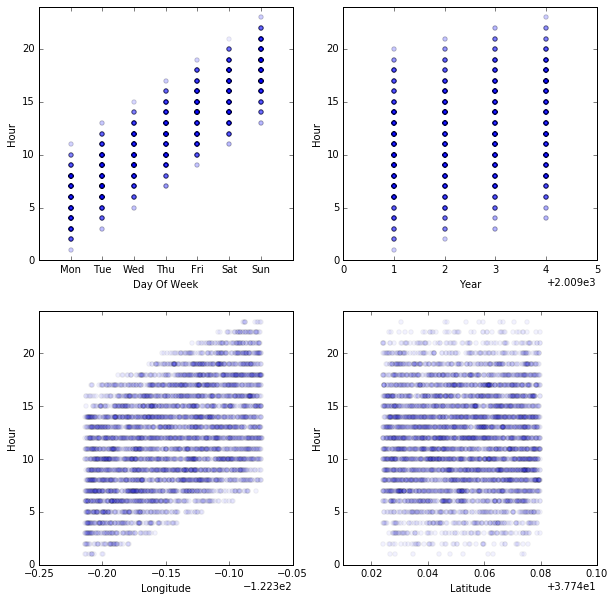

In [82]:
target = extractHour(dfBaron)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
featdict = {d:ix for ix, d in enumerate(Days)}
plt.scatter(dfBaron.DayOfWeek.apply(lambda d: featdict[d]), target, alpha=0.02);
plt.ylabel('Hour')
plt.ylim(0,24)
plt.xlabel("Day Of Week")
plt.xticks(range(len(Days)), [day[:3] for day in Days]);

plt.subplot(2,2,2)
plt.scatter(extractYear(dfBaron), target, alpha=0.02);
plt.ylabel('Hour'); plt.xlabel("Year")
plt.xlim(2009,2014)
plt.ylim(0,24);

plt.subplot(2,2,3)
plt.scatter(dfBaron.X, target, alpha=0.05);
plt.ylabel('Hour')
plt.xlabel("Longitude")
plt.ylim(0,24);

plt.subplot(2,2,4)
plt.scatter(dfBaron.Y, target, alpha=0.05);
plt.ylabel('Hour')
plt.xlabel("Latitude")
plt.ylim(0,24);

It is seen from the scatterplots that the Hour of the day of an incident is linearly correlated with the parameters, Day of Week, year and longitude. These parameters can be expected to help fitting the model.
The latitude is not, or almost not, correlated with the hour and can expect to not have an effect on the fitting.

## Predicting red baron time of attacks from the day of the week

In [83]:
# Create linear model
X = oneHotEncode(training.DayOfWeek, Days)
target = extractHour(training).values

# Ignore intercept keep the parameters in hours
mdl = linear_model.LinearRegression(fit_intercept=False).fit(X,target)
print "Model Coefficients = %s" % zip(X.columns, mdl.coef_)

# Test Linear model
pred = mdl.predict(oneHotEncode(validation.DayOfWeek, Days).values)
predTarget = extractHour(validation).values

print "R²: %s" % Rsquared(pred, predTarget)

Model Coefficients = [('Monday', 5.8472998137802614), ('Tuesday', 7.89525368248772), ('Wednesday', 9.8420107719928147), ('Thursday', 11.890130353817508), ('Friday', 13.908934707903756), ('Saturday', 15.816188870151764), ('Sunday', 18.206654991243433)]
R²: 0.644022672685


With the intercept at 0 and using a one hot encoding, the parameters of the model will be the mean value of an attack that specific date. This fits the data seen in the initial scatterplot. The "low" attained R² also seems probable as the variance around the day mean is pretty high (see scatter plot).

### Plotting the fit

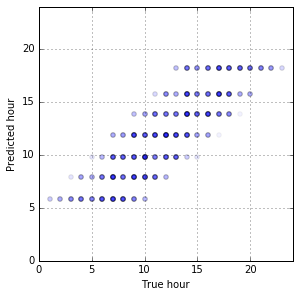

In [84]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(predTarget, pred, alpha=0.05);
plt.xlabel('True hour')
plt.xlim(0,24);
plt.ylabel("Predicted hour")
plt.ylim(0,24);
plt.grid(True)

## Adding date

In [85]:
# Create linear model
X = oneHotEncode(training.DayOfWeek, Days).join(
    removeIntercept(extractYear(training)))
target = extractHour(training).values

mdl2 = linear_model.LinearRegression(fit_intercept=False, normalize = True).fit(X,target)
print "Model Coefficients = %s" % zip(X.columns, mdl2.coef_)

# Test Linear model
pred = mdl2.predict(oneHotEncode(validation.DayOfWeek, Days).join(
        removeIntercept(extractYear(validation))))
predTarget = extractHour(validation).values

print "R²: %s" % Rsquared(pred, predTarget)

Model Coefficients = [('Monday', 4.382612209781426), ('Tuesday', 6.397689801594348), ('Wednesday', 8.4457616417339523), ('Thursday', 10.41996386850696), ('Friday', 12.453020845111997), ('Saturday', 14.413743082515973), ('Sunday', 16.672884866840771), ('Date', 0.9807197547972244)]
R²: 0.754428665603


Adding the date, is increasing the fit (larger R²) as the noise on the date and the day of week parameters are not correlated.
To keep the possibility of of parameter interpretation open, the minimum of the date feature is subtracted form this feature.

### Plotting the fit

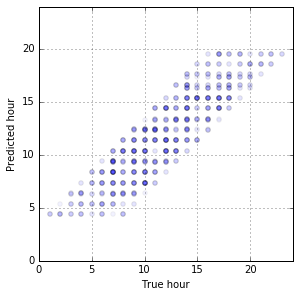

In [86]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(predTarget, pred, alpha=0.05);
plt.xlabel('True hour')
plt.xlim(0,24);
plt.ylabel("Predicted hour")
plt.ylim(0,24);
plt.grid(True)

## Adding longitude

In [87]:
# Create linear model
X = oneHotEncode(training.DayOfWeek, Days).join(
    removeIntercept(extractYear(training))).join(
    removeIntercept(training.X))
X=X.rename(columns = {'X':'Longitude'})
target = extractHour(training).values

mdl3 = linear_model.LinearRegression(fit_intercept=False, normalize = True).fit(X,target)
print "Model Coefficients = %s" % zip(X.columns, mdl3.coef_)

# Test Linear model
pred = mdl3.predict(oneHotEncode(validation.DayOfWeek, Days).join(
        removeIntercept(extractYear(validation))).join(
        removeIntercept(validation.X)))
predTarget = extractHour(validation).values

print "R²: %s" % Rsquared(pred, predTarget)

Model Coefficients = [('Monday', 0.98888979549303002), ('Tuesday', 3.0063806100170014), ('Wednesday', 5.021324487285642), ('Thursday', 7.0086040857715561), ('Friday', 9.0106001319960516), ('Saturday', 11.008841967992897), ('Sunday', 13.003465820716611), ('Date', 0.9952138381453608), ('Longitude', 50.209773041837032)]
R²: 0.991719139586


Now the latitude is also used as a feature for estimation, and the goodness of fit almost reaches 1.
The parameters can again be iterpreted as Hour for the days, hour per day since the 1st, and hour per degree change in latitude compared to the minimum latitude.

### Plotting the fit

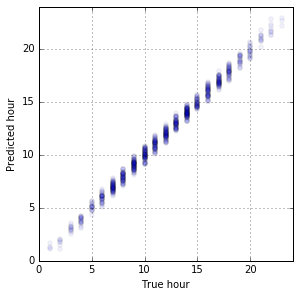

In [88]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(predTarget, pred, alpha=0.05);
plt.xlabel('True hour')
plt.xlim(0,24);
plt.ylabel("Predicted hour")
plt.ylim(0,24);
plt.grid(True)

## Adding latitude
As per the initial scatter plots this will not provide a better fit than before since hour and latitude are uncorrelated

In [89]:
# Create linear model
X = oneHotEncode(training.DayOfWeek, Days).join(
    removeIntercept(extractYear(training))).join(
    removeIntercept(training.X)).join(
    removeIntercept(training.Y))
X=X.rename(columns = {'X':'Longitude'})
X=X.rename(columns = {'Y':'Latitude'})
target = extractHour(training).values

mdl4 = linear_model.LinearRegression(fit_intercept=False, normalize = True).fit(X,target)
print "Model Coefficients = %s" % zip(X.columns, mdl3.coef_)

# Test Linear model
pred = mdl4.predict(oneHotEncode(validation.DayOfWeek, Days).join(
        removeIntercept(extractYear(validation))).join(
        removeIntercept(validation.X)).join(
        removeIntercept(validation.Y)))
predTarget = extractHour(validation).values

print "R²: %s" % Rsquared(pred, predTarget)

Model Coefficients = [('Monday', 0.98888979549303002), ('Tuesday', 3.0063806100170014), ('Wednesday', 5.021324487285642), ('Thursday', 7.0086040857715561), ('Friday', 9.0106001319960516), ('Saturday', 11.008841967992897), ('Sunday', 13.003465820716611), ('Date', 0.9952138381453608), ('Longitude', 50.209773041837032)]
R²: 0.991710562994


As predicted the same R² is achieved, proving that the latitude and hour are linearly uncorrelated

